In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import dp_algorithms

data = pd.read_csv('data/student-mat.csv', sep = ';')

data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [2]:
# convert all the features into numerical ones
data['school']     = data['school'].apply(lambda x: 0 if x == "GP" else 1)
data['sex']        = data['sex'].apply(lambda x: 0 if x == "F" else 1)
data['paid']       = data['paid'].apply(lambda x: 0 if x == "no" else 1)
data['address']    = data['address'].apply(lambda x: 0 if x == "R" else 1)
data['famsize']    = data['famsize'].apply(lambda x: 0 if x == "GT3" else 1)
data['Pstatus']    = data['Pstatus'].apply(lambda x: 0 if x == "A" else 1)
data['Mjob']       = data['Mjob'].apply(lambda x: 1 if x == "teacher" else 2 \
                                        if x == "health" else 3 if x == "services" else 4 \
                                        if x == "at_home" else 5)
data['Fjob']       = data['Fjob'].apply(lambda x: 1 if x == "teacher" else 2 \
                                        if x == "health" else 3 if x == "services" else 4 \
                                        if x == "at_home" else 5)
data['reason']     = data['reason'].apply(lambda x: 1 if x == "home" else 2 \
                                          if x == "reputation" else 3 if "course" else 4)
data['guardian']   = data['guardian'].apply(lambda x: 1 if x == "mother" else 2 \
                                            if x == "father" else 3)
data['schoolsup']  = data['schoolsup'].apply(lambda x: 0 if x == "no" else 1)
data['famsup']     = data['famsup'].apply(lambda x: 0 if x == "no" else 1)
data['activities'] = data['activities'].apply(lambda x: 0 if x == "no" else 1)
data['nursery']    = data['nursery'].apply(lambda x: 0 if x == "no" else 1)
data['higher']     = data['higher'].apply(lambda x: 0 if x == "no" else 1)
data['internet']   = data['internet'].apply(lambda x: 0 if x == "no" else 1)
data['romantic']   = data['romantic'].apply(lambda x: 0 if x == "no" else 1)

# also convert the final grades to 0(fail) and pass
data['G3'] = data['G3'].apply(lambda x: 0 if x < 10 else 1)

In [3]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,4,1,...,4,3,4,1,1,3,6,5,6,0
1,0,0,17,1,0,1,1,1,4,5,...,5,3,3,1,1,3,4,5,5,0
2,0,0,15,1,1,1,1,1,4,5,...,4,3,2,2,3,3,10,7,8,1
3,0,0,15,1,0,1,4,2,2,3,...,3,2,2,1,1,5,2,15,14,1
4,0,0,16,1,0,1,3,3,5,5,...,4,3,2,1,2,5,4,6,10,1


In [4]:
target = data['G3']
data = data.drop('G3', axis = 1)
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,0,0,18,1,0,0,4,4,4,1,...,0,4,3,4,1,1,3,6,5,6
1,0,0,17,1,0,1,1,1,4,5,...,0,5,3,3,1,1,3,4,5,5
2,0,0,15,1,1,1,1,1,4,5,...,0,4,3,2,2,3,3,10,7,8
3,0,0,15,1,0,1,4,2,2,3,...,1,3,2,2,1,1,5,2,15,14
4,0,0,16,1,0,1,3,3,5,5,...,0,4,3,2,1,2,5,4,6,10


In [5]:
# center the features and ensure that each row has its euclidean norm <= 1
data = data - data.mean()
data = data.divide(np.linalg.norm(data.values, axis = 1), axis = 0)

data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,-0.013052,-0.053061,0.146131,0.024970,-0.032347,-0.100447,0.140172,0.165710,0.057885,-0.331420,...,-0.037455,0.006242,-0.026389,0.099880,-0.053912,-0.144712,-0.062141,0.032631,-0.662272,-0.528342
1,-0.012719,-0.051704,0.033179,0.024331,-0.031520,0.011336,-0.191054,-0.166170,0.056404,0.113914,...,-0.036497,0.115296,-0.025714,-0.011889,-0.052533,-0.141010,-0.060551,-0.186631,-0.645327,-0.624037
2,-0.014576,-0.059253,-0.212296,0.027884,0.089038,0.012991,-0.218950,-0.190433,0.064639,0.130546,...,-0.041826,0.006971,-0.029468,-0.138785,0.064956,0.088721,-0.069392,0.537078,-0.489232,-0.339674
3,-0.014893,-0.060541,-0.216913,0.028490,-0.036908,0.013274,0.159933,-0.066693,-0.189718,-0.122378,...,0.085147,-0.120759,-0.157990,-0.141803,-0.061513,-0.165113,0.184862,-0.474295,0.523182,0.420229
4,-0.018548,-0.075403,-0.110887,0.035484,-0.045968,0.016532,0.039919,0.076210,0.241533,0.166130,...,-0.053226,0.008871,-0.037500,-0.176613,-0.076613,-0.046371,0.230243,-0.272178,-0.781857,-0.113710


In [6]:
# split the data into training(80%) and testing, then perform non-private pca on the training set
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size = 0.2)

# compute the empirical covariance matrix
empirical_covariance_matrix = np.matmul(x_train.transpose(), x_train)
empirical_covariance_matrix = empirical_covariance_matrix / x_train.shape[0]

# calculate the eigenvalues and eigenvectors and sort the eigenvectors after the eigenvalues
eigen_values, eigen_vectors = np.linalg.eig(empirical_covariance_matrix)

idx = eigen_values.argsort()[::-1]
eigen_values  = eigen_values[idx]
eigen_vectors = eigen_vectors[:, idx] 

# display the eigenvalues
print("Eigenvalues: \n{}".format(eigen_values))

Eigenvalues: 
[0.34562428 0.27139747 0.05629479 0.04962373 0.03685176 0.03088451
 0.02472885 0.0227271  0.0196016  0.01869948 0.01561574 0.0131573
 0.01217522 0.01086322 0.00903921 0.00871113 0.00730522 0.00613673
 0.00565079 0.00452906 0.00437497 0.00408526 0.00355013 0.00317502
 0.00301486 0.0025377  0.00246037 0.00202847 0.00192061 0.00140127
 0.00121762 0.00061653]


In [7]:
# compute the top-k subspace for k = 1 to k = 10, do linear regression on each of these projections and store the 
# accuracy rate

accuracy = []
for i in range(1, 11):
    projected_train = np.matmul(x_train, eigen_vectors[:,:i])
    projected_test  = np.matmul(x_test, eigen_vectors[:, :i])
    
    regression = LogisticRegression(solver = 'liblinear').fit(projected_train, y_train)
    accuracy.append(accuracy_score(regression.predict(projected_test), y_test))
    
print("Accuracy rate: {}".format(accuracy))

Accuracy rate: [0.6708860759493671, 0.8607594936708861, 0.8607594936708861, 0.8607594936708861, 0.8607594936708861, 0.8607594936708861, 0.8607594936708861, 0.8607594936708861, 0.8607594936708861, 0.8734177215189873]


## The Gaussian Mechanism

In [10]:
delta   = [0.001, 0.01, 0.1, 0.5, 1, 1.2]
epsilon = [0.001, 0.01, 0.1, 0.5, 1]

accuracy_gaussian_mechanism = []
for _delta in delta:
    for _epsilon in epsilon:
        
        print("=" * 100)
        print("Running for delta {} and epsilon {}".format(_delta, _epsilon))
        
        noisy_empirical_covariance_matrix = dp_algorithms.gaussian_mechanism(x_train, _epsilon, _delta)
        
        # calculate the eigenvalues and eigenvectors and sort the eigenvectors after the eigenvalues
        eigen_values, eigen_vectors = np.linalg.eig(noisy_empirical_covariance_matrix)

        idx = eigen_values.argsort()[::-1]
        eigen_values  = eigen_values[idx]
        eigen_vectors = eigen_vectors[:, idx] 
        
        # display the eigenvalues
        print("Eigenvalues: \n{}".format(eigen_values))
        
        # compute the top-k subspace for k = 1 to k = 10, do linear regression on each of these projections and store the 
        # rms error
        accuracy_temporary = []
        for i in range(1, 11):
            projected_train = np.matmul(x_train, eigen_vectors[:,:i])
            projected_test  = np.matmul(x_test, eigen_vectors[:, :i])

            regression = LogisticRegression(solver = 'liblinear').fit(projected_train, y_train)
            accuracy_temporary.append(accuracy_score(regression.predict(projected_test), y_test))

        print("Accuracy rate: {}".format(accuracy_temporary))
        accuracy_gaussian_mechanism.append(accuracy_temporary)

Running for delta 0.001 and epsilon 0.001
Eigenvalues: 
[ 1.57941142e+08  1.34024965e+08  1.30348260e+08  1.19019456e+08
  9.53542028e+07  8.87673178e+07  8.35716320e+07  7.04091721e+07
  6.90468647e+07  6.13081420e+07  5.54634390e+07  4.38650961e+07
  3.00485189e+07  2.55772753e+07  1.65747552e+07  8.88365292e+06
  1.31824670e+06 -3.92007662e+06 -1.69744526e+07 -3.04648034e+07
 -3.12614850e+07 -4.50037866e+07 -5.90235947e+07 -6.58361863e+07
 -7.31254214e+07 -8.56697540e+07 -9.33299170e+07 -1.05963862e+08
 -1.20487327e+08 -1.25490113e+08 -1.41095678e+08 -1.43460574e+08]
Accuracy rate: [0.6582278481012658, 0.6835443037974683, 0.6835443037974683, 0.8227848101265823, 0.8354430379746836, 0.810126582278481, 0.8227848101265823, 0.810126582278481, 0.8227848101265823, 0.8227848101265823]
Running for delta 0.001 and epsilon 0.01
Eigenvalues: 
[ 1478037.59555606  1331929.7905746   1216480.14710128  1031455.23773262
   942562.84916778   925815.9862646    845016.0139675    821383.27247298
   66431

Eigenvalues: 
[ 523207.28185206  504620.45348553  397625.3336828   385820.24474137
  344706.57843616  328632.58732924  300919.94743431  279225.54138627
  234942.0831817   200738.42490553  189692.4660549   117357.71452357
   95778.90255912   62249.94195979   42439.27039621   25435.73395685
   -4437.96158072  -59576.03959158  -65103.98019558  -84227.37539858
 -119789.17063891 -172461.81966804 -203173.32197773 -238124.57638151
 -245555.45275043 -275699.2879208  -297719.50926249 -361466.47591163
 -375027.80544366 -394651.84083423 -455568.15381668 -534396.13158499]
Accuracy rate: [0.6708860759493671, 0.6708860759493671, 0.7341772151898734, 0.7721518987341772, 0.7721518987341772, 0.7721518987341772, 0.7974683544303798, 0.8607594936708861, 0.8607594936708861, 0.8481012658227848]
Running for delta 0.1 and epsilon 0.1
Eigenvalues: 
[ 5472.02082703  5184.56657869  4414.32080223  3808.00545006
  3295.88196028  2839.75362941  2418.86018327  2304.56646748
  1851.28601318  1769.2103283   1371.044408

Accuracy rate: [0.6708860759493671, 0.6708860759493671, 0.7215189873417721, 0.7721518987341772, 0.7974683544303798, 0.7974683544303798, 0.7848101265822784, 0.8607594936708861, 0.8227848101265823, 0.810126582278481]
Running for delta 1.2 and epsilon 0.01
Eigenvalues: 
[ 8518.38004487  7655.35511047  6802.75013297  6289.00374717
  5279.22423172  4679.90730763  4192.9599511   3707.6799791
  3351.40104566  3013.00499899  2418.13628832  2020.19820158
  1809.67321722   938.41760668   691.18605534   392.02454656
  -122.55681697  -503.57248907 -1076.49274245 -1909.67201282
 -2318.15285986 -2621.15983285 -2828.7367622  -3161.05462009
 -3688.12504952 -4867.0734869  -5018.1500999  -5396.42841504
 -6031.08159019 -6933.64483127 -7971.66911714 -9276.30251932]
Accuracy rate: [0.8354430379746836, 0.810126582278481, 0.8227848101265823, 0.810126582278481, 0.810126582278481, 0.8354430379746836, 0.8354430379746836, 0.8734177215189873, 0.8734177215189873, 0.8607594936708861]
Running for delta 1.2 and epsil

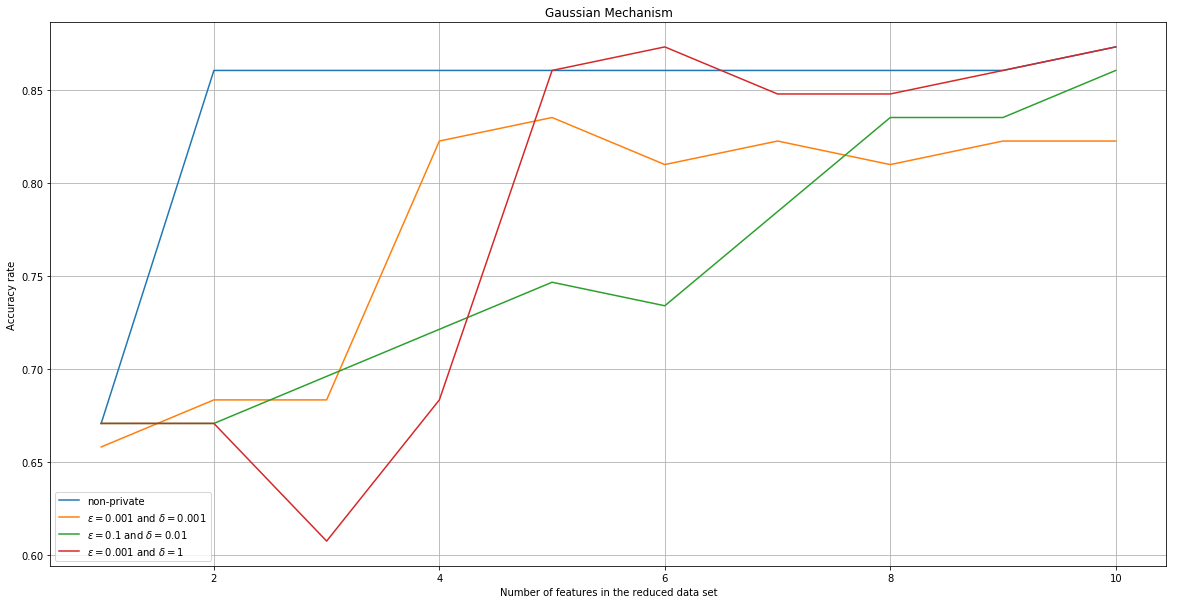

In [28]:
fig = plt.figure(figsize = (20, 10))
ax  = fig.add_subplot(1, 1, 1)
plt.grid()
plt.xlabel("Number of features in the reduced data set")
plt.ylabel("Accuracy rate")
plt.title("Gaussian Mechanism")
plt.plot(range(1, 11), accuracy, label = 'non-private')
plt.plot(range(1, 11), accuracy_gaussian_mechanism[0], label = '$\epsilon = 0.001$ and $\delta = 0.001$')
plt.plot(range(1, 11), accuracy_gaussian_mechanism[7], label = '$\epsilon = 0.1$ and $\delta = 0.01$')
plt.plot(range(1, 11), accuracy_gaussian_mechanism[20], label = '$\epsilon = 0.001$ and $\delta = 1$')
plt.legend(loc = 'best')
plt.show()

## The Wishart Input Perturbation

In [9]:
epsilon = [0.001, 0.01, 0.1, 0.5, 1, 2]

accuracy_wishart_mechanism = []
for _epsilon in epsilon:
    
    print("=" * 100)
    print("Running for epsilon {}".format(_epsilon))
    noisy_empirical_covariance_matrix = dp_algorithms.wishart_mechanism(x_train, _epsilon)
    
    eigen_values, eigen_vectors = np.linalg.eig(noisy_empirical_covariance_matrix)

    idx = eigen_values.argsort()[::-1]
    eigen_values  = eigen_values[idx]
    eigen_vectors = eigen_vectors[:, idx] 
    
    print("Eigenvalues: {}".format(eigen_values))
    
    accuracy_temporary = []
    for i in range(1, 11):
        projected_train = np.matmul(x_train, eigen_vectors[:,:i])
        projected_test  = np.matmul(x_test, eigen_vectors[:, :i])

        regression = LogisticRegression(solver = 'liblinear').fit(projected_train, y_train)
        accuracy_temporary.append(accuracy_score(regression.predict(projected_test), y_test))

    print("Accuracy rate: {}".format(accuracy_temporary))
    accuracy_wishart_mechanism.append(accuracy_temporary)

Running for epsilon 0.001
Eigenvalues: [5.40598482e+02 4.88992683e+02 4.75081685e+02 3.92659785e+02
 3.59732699e+02 3.34933096e+02 2.85590422e+02 2.63600870e+02
 2.51267374e+02 2.21837912e+02 2.14884803e+02 1.83240045e+02
 1.57062107e+02 1.54776607e+02 1.38532566e+02 1.22282882e+02
 1.07076045e+02 8.06754339e+01 6.08812353e+01 5.55238161e+01
 4.39525250e+01 3.94502918e+01 3.81427249e+01 2.97983611e+01
 2.10558016e+01 1.54175007e+01 9.74983277e+00 5.92292138e+00
 3.63143586e+00 2.63971035e+00 8.08982475e-01 1.48235450e-01]
Accuracy rate: [0.6708860759493671, 0.6708860759493671, 0.7215189873417721, 0.8227848101265823, 0.8227848101265823, 0.8227848101265823, 0.8227848101265823, 0.8227848101265823, 0.7974683544303798, 0.8227848101265823]
Running for epsilon 0.01
Eigenvalues: [49.28938413 47.92955939 45.0508092  38.91458731 34.48903927 31.58675903
 28.9619432  28.48945576 27.42659748 21.63108094 19.52728887 18.37992212
 16.22358972 13.92053126 12.99178102 12.48909941 10.5857755   8.94908502

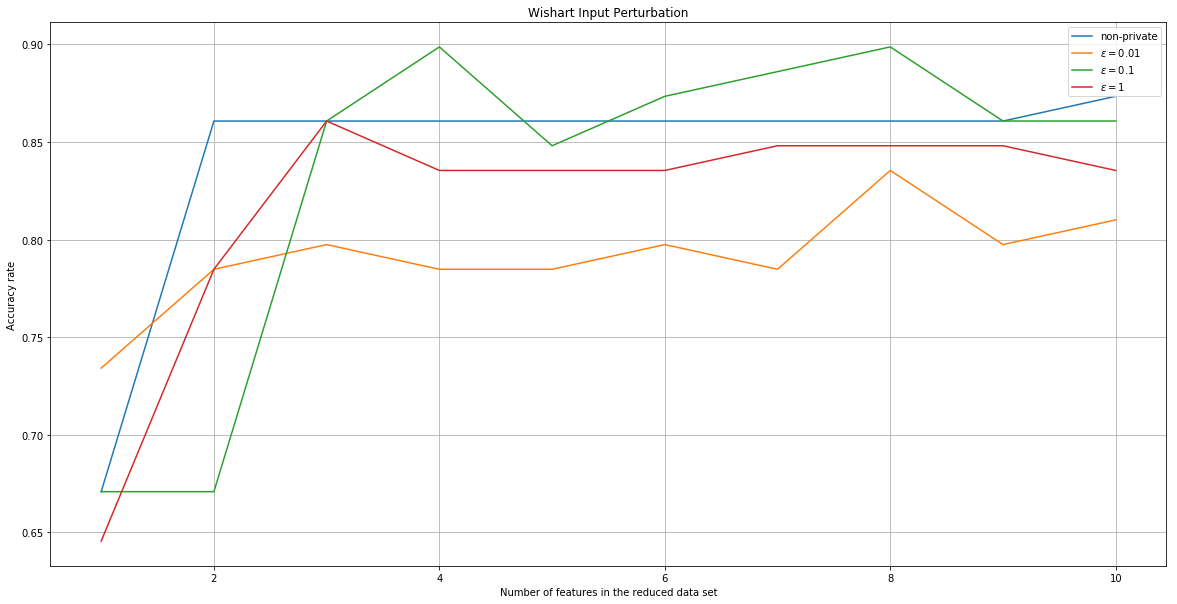

In [22]:
fig = plt.figure(figsize = (20, 10))
ax  = fig.add_subplot(1, 1, 1)
plt.grid()
plt.xlabel("Number of features in the reduced data set")
plt.ylabel("Accuracy rate")
plt.title("Wishart Input Perturbation")
plt.plot(range(1, 11), accuracy, label = 'non-private')
plt.plot(range(1, 11), accuracy_wishart_mechanism[1], label = '$\epsilon = 0.01$')
plt.plot(range(1, 11), accuracy_wishart_mechanism[2], label = '$\epsilon = 0.1$')
plt.plot(range(1, 11), accuracy_wishart_mechanism[4], label = '$\epsilon = 1$')
plt.legend(loc = 'best')
plt.show()